# Import Module

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import get_x_y

# Free Params

In [2]:
num_obs = 48
num_days = 5
num_samples = num_obs*num_days

energy_1 = 1e6
energy_0 = 0.2*1e6

breakfast_t = 18
dinner_t = 35

# Generate Data

In [3]:
test_x = []

for t in range(0, num_obs, 1):
    if t < breakfast_t:
        test_x.append(energy_1)
    elif dinner_t < t:
        test_x.append(energy_1)
    else:
        test_x.append(energy_0)

test_x = test_x*num_days
noise = np.random.normal(energy_1/25, energy_1/10, (num_samples, ))

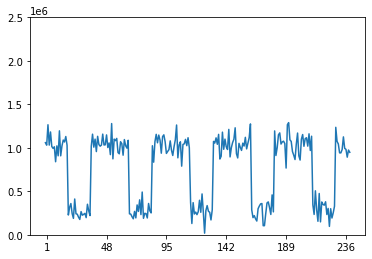

In [4]:
plt.plot(test_x + noise)
plt.xticks(range(1, num_samples, 47))
plt.ylim([0, 2.5e6])
plt.show()

In [5]:
simulate_y = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]*num_days
simulate_y = pd.DataFrame(simulate_y)

# Feature Extraction

In [6]:
means, maxs, mins, stds, ranges = get_x_y.create_features(energy=(test_x + noise))
times = [t for t in range(0, 24, 1)] * num_days
seasons = [1 for i in range(int(num_samples/2))]
is_sundays = [0 for i in range(int(num_samples/2))]
ratio_sum = means / max(means)

features_sum = pd.DataFrame({
    "Ratio": ratio_sum, "Mean": means, "Max": maxs,
    "Min": mins, "Std": stds, "Range": ranges,
    "Time": times, "Season": seasons, "Sunday": is_sundays
    })

In [7]:
features_sum["Lag-1_Ratio"] = np.append(0.5, features_sum["Ratio"].values[:-1])
features_sum["Lag+1_Ratio"] = np.append(features_sum["Ratio"].values[1:], 0.5)

features_sum = features_sum[(features_sum.Time > 5) & (features_sum.Time < 22)]
am_pm = get_x_y.get_am_pm(times=features_sum["Time"])
features_sum = features_sum.drop(columns="Time")
features_sum = features_sum.reset_index(drop=True)
features_sum = pd.concat([features_sum, am_pm], axis=1)
features_sum = features_sum.rename({0: "Am", 1: "Lunch", 2: "Pm"}, axis=1)

features_sum = features_sum.reindex([
    'Ratio', 'Mean', 'Max', 'Min',
    'Std', 'Range', 'Lag-1_Ratio', 'Lag+1_Ratio',
    'Season', 'Sunday', 'Am', 'Lunch', 'Pm'
    ], axis=1)

In [8]:
features_sum.to_csv("X_simulate.csv", index=False)
simulate_y.to_csv("Y_simulate.csv", index=False)